In [2]:
! pip install -q catsim

In [3]:
from catsim.cat import generate_item_bank
from catsim import plot

In [4]:
from catsim.initialization import RandomInitializer
from catsim.estimation import NumericalSearchEstimator
from catsim.simulation import Simulator
from catsim.stopping import MaxItemStopper, MinErrorStopper

In [5]:
from catsim.selection import RandomSelector
from catsim.selection import UrrySelector
from catsim.selection import MaxInfoSelector

# Задание №1

Реализуйте цикл тестирования, состоящий из инициализации, (случайного) выбора заданий, сбора ответа, обновления оценки для уровня подготовленности и проверки критерия завершения. Для обновления оценки используйте результаты лабораторной работы 1.

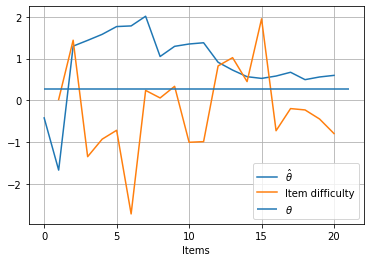

In [6]:
simulator = Simulator(generate_item_bank(n=300, itemtype='2PL'), 
                      1000)

initializer = RandomInitializer()
random_selector = RandomSelector() # Случайный выбор заданий
estimator = NumericalSearchEstimator()
stopper = MaxItemStopper(20)

simulator.simulate(initializer, 
                   random_selector, 
                   estimator, 
                   stopper)

plot.test_progress(simulator=simulator, 
                   index=0)

# Задание №2

Сравните разные методы рекомендации заданий: случайный выбор и адаптивный выбор с помощью максимальной информации Фишера. Задайте точность оценивания, равную 0.1. Сколько заданий необходимо предъявить пользователю для достижения требуемой точности в зависимости от его уровня подготовленности?

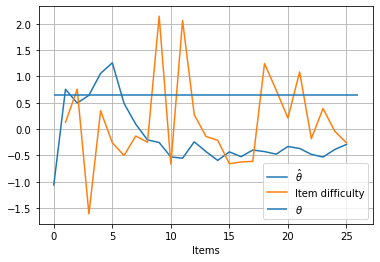

In [11]:
simulator = Simulator(generate_item_bank(n=300,itemtype='2PL'), 
                      1000) # 1000 репликаций?

initializer = RandomInitializer()
random_selector = RandomSelector() # Случайный выбор заданий
estimator = NumericalSearchEstimator() # задаем точность
stopper = MinErrorStopper(0.4)

simulator.simulate(initializer, 
                   random_selector, 
                   estimator, 
                   stopper)

plot.test_progress(simulator=simulator, 
                   index=0)

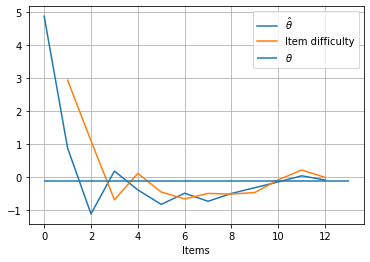

In [10]:
simulator = Simulator(generate_item_bank(n=300,itemtype='2PL'), 
                      1000) # 1000 репликаций?

initializer = RandomInitializer()
random_selector = MaxInfoSelector() 
estimator = NumericalSearchEstimator() # задаем точность
stopper = MinErrorStopper(0.4)

simulator.simulate(initializer, 
                   random_selector, 
                   estimator, 
                   stopper)

plot.test_progress(simulator=simulator, 
                   index=0)